In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load Dataset
df = pd.read_csv("/content/food_orders_clean.csv")

/tmp/ipython-input-1071607253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="product_name", order=df["product_name"].value_counts().index, palette="Set2")


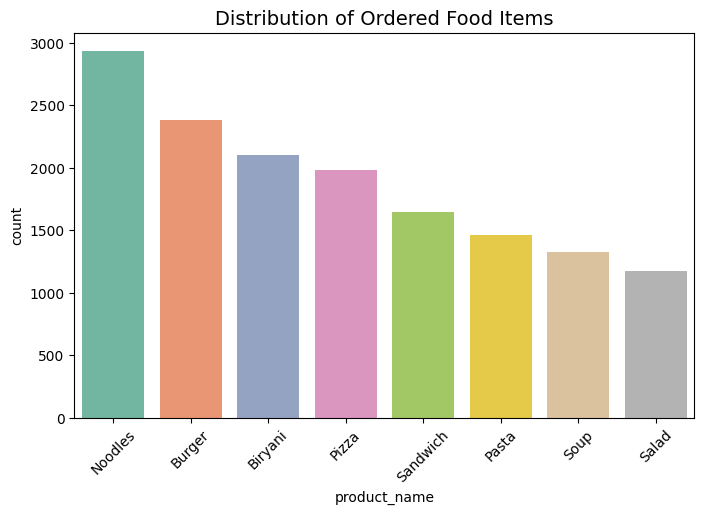

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="product_name", order=df["product_name"].value_counts().index, palette="Set2")
plt.title("Distribution of Ordered Food Items", fontsize=14)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2472199287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="gender", palette="pastel")


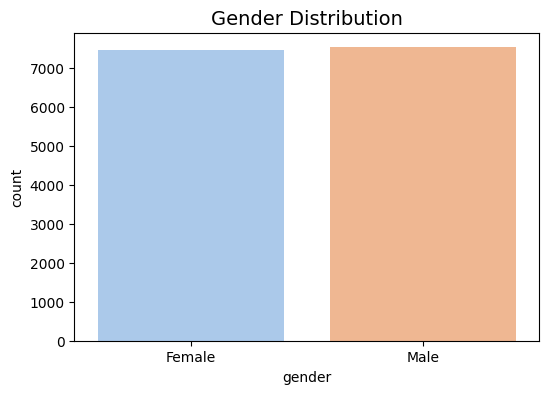

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="gender", palette="pastel")
plt.title("Gender Distribution", fontsize=14)
plt.show()

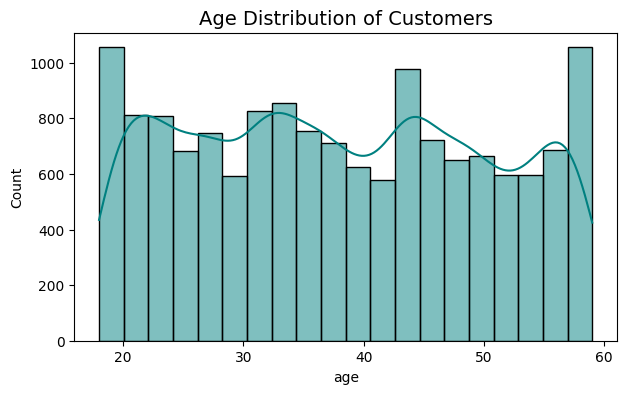

In [ ]:
# Plotting the Age Distribution of Customers in the Food Order Prediction dataset
# This visualization helps understand the demographic spread of customers by age.
# The histogram shows how many customers fall into each age range, while the KDE
# indicates the probability density of age distribution.
# Insights from this plot can reveal if the dataset is biased toward any age group
# (e.g., younger or older customers), which may affect model predictions on order behavior.
plt.figure(figsize=(7,4))
sns.histplot(df["age"], bins=20, kde=True, color="teal")
plt.title("Age Distribution of Customers", fontsize=14)
plt.show()

/tmp/ipython-input-1067088442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="order_dow", palette="viridis")


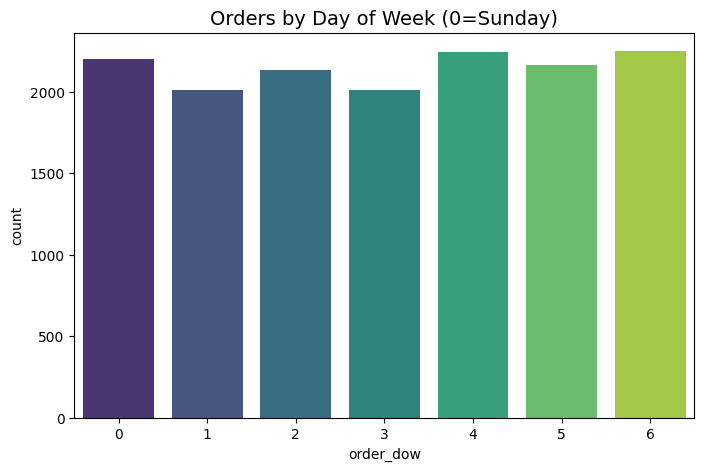

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="order_dow", palette="viridis")
plt.title("Orders by Day of Week (0=Sunday)", fontsize=14)
plt.show()

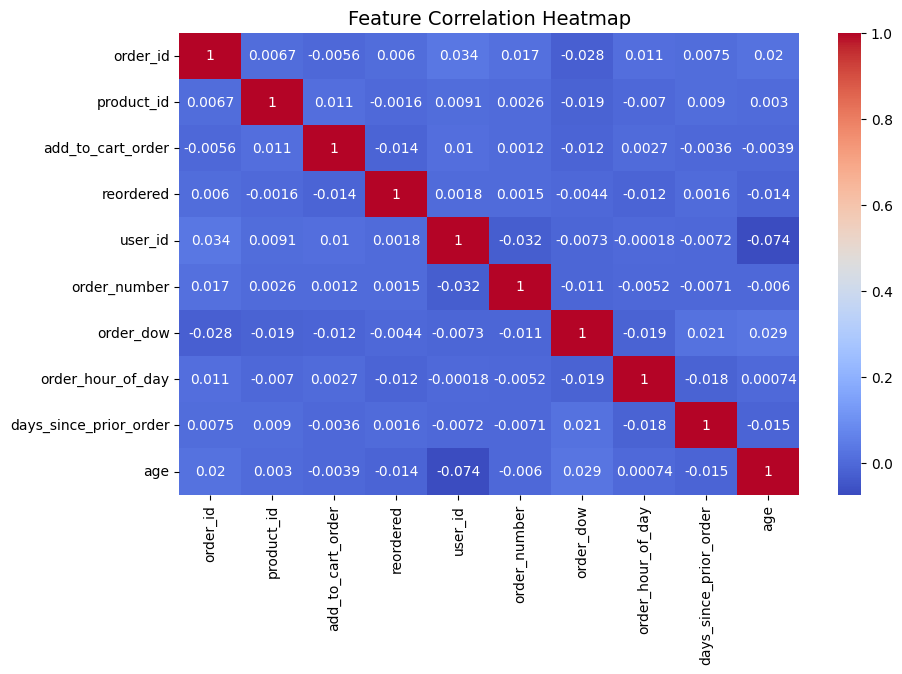

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
categorical_cols = ["gender", "location", "aisle", "department", "product_name"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop("product_name", axis=1)
y = df["product_name"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(classification_report(y_test, y_pred_lr))
print("-"*60)

Training Logistic Regression...
Logistic Regression Accuracy: 0.2270
              precision    recall  f1-score   support

           0       0.27      0.01      0.01       420
           1       0.25      0.28      0.26       476
           2       0.23      0.74      0.35       586
           3       0.41      0.02      0.05       293
           4       0.11      0.04      0.06       397
           5       0.00      0.00      0.00       234
           6       0.22      0.28      0.25       329
           7       0.00      0.00      0.00       265

    accuracy                           0.23      3000
   macro avg       0.19      0.17      0.12      3000
weighted avg       0.20      0.23      0.15      3000

------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train SVM
print("Training SVM...")
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))
print("-"*60)

Training SVM...
SVM Accuracy: 0.2297
              precision    recall  f1-score   support

           0       0.25      0.04      0.07       420
           1       0.24      0.29      0.26       476
           2       0.22      0.75      0.34       586
           3       0.00      0.00      0.00       293
           4       0.00      0.00      0.00       397
           5       0.00      0.00      0.00       234
           6       0.24      0.28      0.26       329
           7       0.00      0.00      0.00       265

    accuracy                           0.23      3000
   macro avg       0.12      0.17      0.12      3000
weighted avg       0.14      0.23      0.15      3000

------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train KNN
print("Training KNN...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.4f}")
print(classification_report(y_test, y_pred_knn))
print("-"*60)

Training KNN...
KNN Accuracy: 0.2117
              precision    recall  f1-score   support

           0       0.16      0.30      0.21       420
           1       0.21      0.27      0.24       476
           2       0.27      0.34      0.30       586
           3       0.13      0.08      0.10       293
           4       0.25      0.18      0.21       397
           5       0.13      0.06      0.09       234
           6       0.24      0.15      0.18       329
           7       0.20      0.09      0.12       265

    accuracy                           0.21      3000
   macro avg       0.20      0.18      0.18      3000
weighted avg       0.21      0.21      0.20      3000

------------------------------------------------------------


In [ ]:
# Train Naive Bayes
print("Training Naive Bayes...")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(classification_report(y_test, y_pred_nb))
print("-"*60)

Training Naive Bayes...
Naive Bayes Accuracy: 0.2503
              precision    recall  f1-score   support

           0       0.34      0.12      0.18       420
           1       0.32      0.34      0.33       476
           2       0.24      0.73      0.36       586
           3       0.28      0.02      0.04       293
           4       0.19      0.06      0.09       397
           5       0.05      0.00      0.01       234
           6       0.22      0.23      0.22       329
           7       0.12      0.01      0.01       265

    accuracy                           0.25      3000
   macro avg       0.22      0.19      0.16      3000
weighted avg       0.24      0.25      0.19      3000

------------------------------------------------------------


In [ ]:
# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))
print("-"*60)

Training Random Forest...
Random Forest Accuracy: 0.9380
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       420
           1       0.95      0.90      0.93       476
           2       0.88      0.98      0.93       586
           3       0.95      0.90      0.93       293
           4       0.95      0.96      0.95       397
           5       0.97      1.00      0.98       234
           6       0.99      0.97      0.98       329
           7       0.96      0.86      0.91       265

    accuracy                           0.94      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

------------------------------------------------------------


Best Model: Random Forest with Accuracy 0.9380


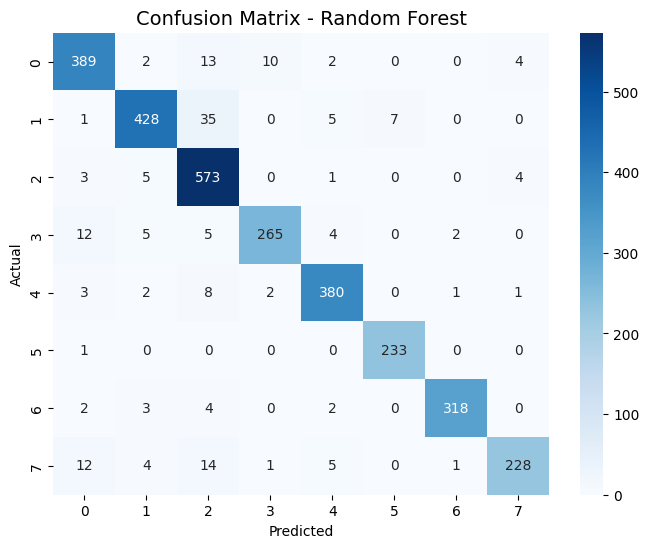

In [ ]:
# Determine the best model based on accuracy
accuracies = {
    "Logistic Regression": acc_lr,
    "SVM": acc_svm,
    "KNN": acc_knn,
    "Naive Bayes": acc_nb,
    "Random Forest": acc_rf
}

best_model_name = max(accuracies, key=accuracies.get)

# Get the best model object
if best_model_name == "Logistic Regression":
    best_model = lr_model
elif best_model_name == "SVM":
    best_model = svm_model
elif best_model_name == "KNN":
    best_model = knn_model
elif best_model_name == "Naive Bayes":
    best_model = nb_model
elif best_model_name == "Random Forest":
    best_model = rf_model

print(f"Best Model: {best_model_name} with Accuracy {accuracies[best_model_name]:.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
joblib.dump(best_model, "final_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")

print(" Final Model + Encoders + Scaler Saved Successfully!")

 Final Model + Encoders + Scaler Saved Successfully!


In [ ]:
print("\nPlease enter the details for prediction \n")

# Take user inputs
add_to_cart_order = int(input("Add to cart order (e.g., 1–10): "))
reordered = int(input("Reordered (0 = No, 1 = Yes): "))
order_number = int(input("Order number (e.g., 1–20): "))
order_dow = int(input("Order day of week (0=Sunday ... 6=Saturday): "))
order_hour_of_day = int(input("Order hour of day (0–23): "))
days_since_prior_order = int(input("Days since prior order: "))

# Provide options for categorical inputs based on training data
aisle_options = label_encoders["aisle"].classes_
department_options = label_encoders["department"].classes_
gender_options = label_encoders["gender"].classes_
location_options = label_encoders["location"].classes_

print(f"Aisle options: {list(aisle_options)}")
aisle = input("Aisle: ")

print(f"Department options: {list(department_options)}")
department = input("Department: ")

age = int(input("Customer age: "))

print(f"Gender options: {list(gender_options)}")
gender = input("Gender (Male/Female): ")

print(f"Location options: {list(location_options)}")
location = input("Location (Urban/Suburban/Rural): ")


sample_input = {
    "add_to_cart_order": add_to_cart_order,
    "reordered": reordered,
    "order_number": order_number,
    "order_dow": order_dow,
    "order_hour_of_day": order_hour_of_day,
    "days_since_prior_order": days_since_prior_order,
    "aisle": aisle,
    "department": department,
    "age": age,
    "gender": gender,
    "location": location,
    # Add dummy values for columns the scaler was trained on but are not user inputs
    "order_id": 0,
    "product_id": 0,
    "user_id": 0
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Encode categorical features
for col in ["aisle", "department", "gender", "location"]:
    le = label_encoders[col]
    if sample_input[col] in le.classes_:
        sample_df[col] = le.transform([sample_input[col]])[0]
    else:
        print(f"'{sample_input[col]}' not in training data for {col}, using default.")
        # Use the most frequent category as a default if the input is not in training data
        sample_df[col] = df[col].mode()[0]

# Ensure the columns are in the same order as the training data
X_columns = scaler.feature_names_in_
sample_df = sample_df[X_columns]


# Scale numerical features
sample_scaled = scaler.transform(sample_df)

# Predict probabilities for each food item
probs = best_model.predict_proba(sample_scaled)[0]

# Decode the product names
product_encoder = label_encoders["product_name"]
food_items = product_encoder.inverse_transform(np.arange(len(probs)))

# Combine items with their probabilities
predictions = pd.DataFrame({
    "Food Item": food_items,
    "Probability": probs
}).sort_values(by="Probability", ascending=False)

# Display top 3
top3 = predictions.head(3)

print("\nTop 3 Predicted Food Items:")
for i, row in top3.iterrows():
    print(f"{row['Food Item']}: {row['Probability']*100:.2f}% chance")

# Best prediction
print("\nMost likely food item:", top3.iloc[0]['Food Item'])


Please enter the details for prediction 

Add to cart order (e.g., 1–10): 8
Reordered (0 = No, 1 = Yes): 1
Order number (e.g., 1–20): 20
Order day of week (0=Sunday ... 6=Saturday): 5
Order hour of day (0–23): 22
Days since prior order: 15
Aisle options: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Aisle: Fresh Fruits
Department options: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Department: Grocery
Customer age: 33
Gender options: [np.int64(0), np.int64(1)]
Gender (Male/Female): Male
Location options: [np.int64(0), np.int64(1), np.int64(2)]
Location (Urban/Suburban/Rural): Rural
'Fresh Fruits' not in training data for aisle, using default.
'Grocery' not in training data for department, using default.
'Male' not in training data for gender, using default.
'Rural' not in training data for location, using default.

Top 3 Predicted Food Items:
2.0: 25.50% chance
4.0: 20.00% chance
0.0: 18.50% chance

Most likely food item: 2.0
